In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Node prices
nodes = {'F16s': {'price_per_month': 620, 'price_per_hour': 0.848, 'CPUs': 16, 'max_sessions': 14}, 
         'F32s': {'price_per_month': 1238, 'price_per_hour': 1.696, 'CPUs': 32, 'max_sessions': 22}, 
         'F72s': {'price_per_month': 2785, 'price_per_hour': 3.816, 'CPUs': 72}, 
         'D96a': {'price_per_month': 3924, 'price_per_hour': 5.376, 'CPUs': 96}}

In [3]:
def session_overlap_updated(hours_in_day=16, users=20, session_length_seconds=120):
    recorded_sessions = []
    overlaps = 0
    overlap_time = []

    seconds_in_day = hours_in_day*60*60

    time_slots = list(range(seconds_in_day))
    sessions = list(range(users))

    import random

    # Start simulating sessions
    for i in sessions:
        start = random.choice(time_slots)
        window = time_slots[start:start + session_length_seconds]
        recorded_sessions.append(window)
        if i % 10000 == 0:
            message = 'Recorded sessions %d / %d complete' % (i, len(sessions))
            print(message)
            
    message = 'Simulation complete'
    print(message)

    return recorded_sessions

In [8]:
#Run simulation to see how many users overlap
users = 100
recorded_sessions = session_overlap_updated(users=users, hours_in_day=16)

Recorded sessions 0 / 100 complete
Simulation complete


In [11]:
from tqdm import tqdm

message = 'Finished recorded sessions, now I will check what the max number of sessions were at any given time'
print(message)

timeslot = list(range(16*60*60))
max_sessions = []

for idx in timeslot:
    check = timeslot[idx:idx+120]
    parallel_sessions = 0
    #print('Checking timeslot %d / %d' % (idx, len(timeslot)-120+1))
    for x, y in enumerate(recorded_sessions):
        #if y[-1] < check[0]:
            #del recorded_sessions[x]
        if len(set(check).intersection(set(y))) > 0:
            parallel_sessions +=1
    max_sessions.append(parallel_sessions)
    if idx % 10000 == 0:
        message = 'Timeslot checking %d / %d complete' % (idx, len(timeslot))
        print(message)
        
message = 'Simulation complete \n Max Sessions = %d' % (np.max(max_sessions))
print(message)

Finished recorded sessions, now I will check what the max number of sessions were at any given time
Timeslot checking 0 / 57600 complete
Timeslot checking 10000 / 57600 complete
Timeslot checking 20000 / 57600 complete
Timeslot checking 30000 / 57600 complete
Timeslot checking 40000 / 57600 complete
Timeslot checking 50000 / 57600 complete
Simulation complete 
 Max Sessions = 4


Average users at each time 40.0


<IPython.core.display.Javascript object>


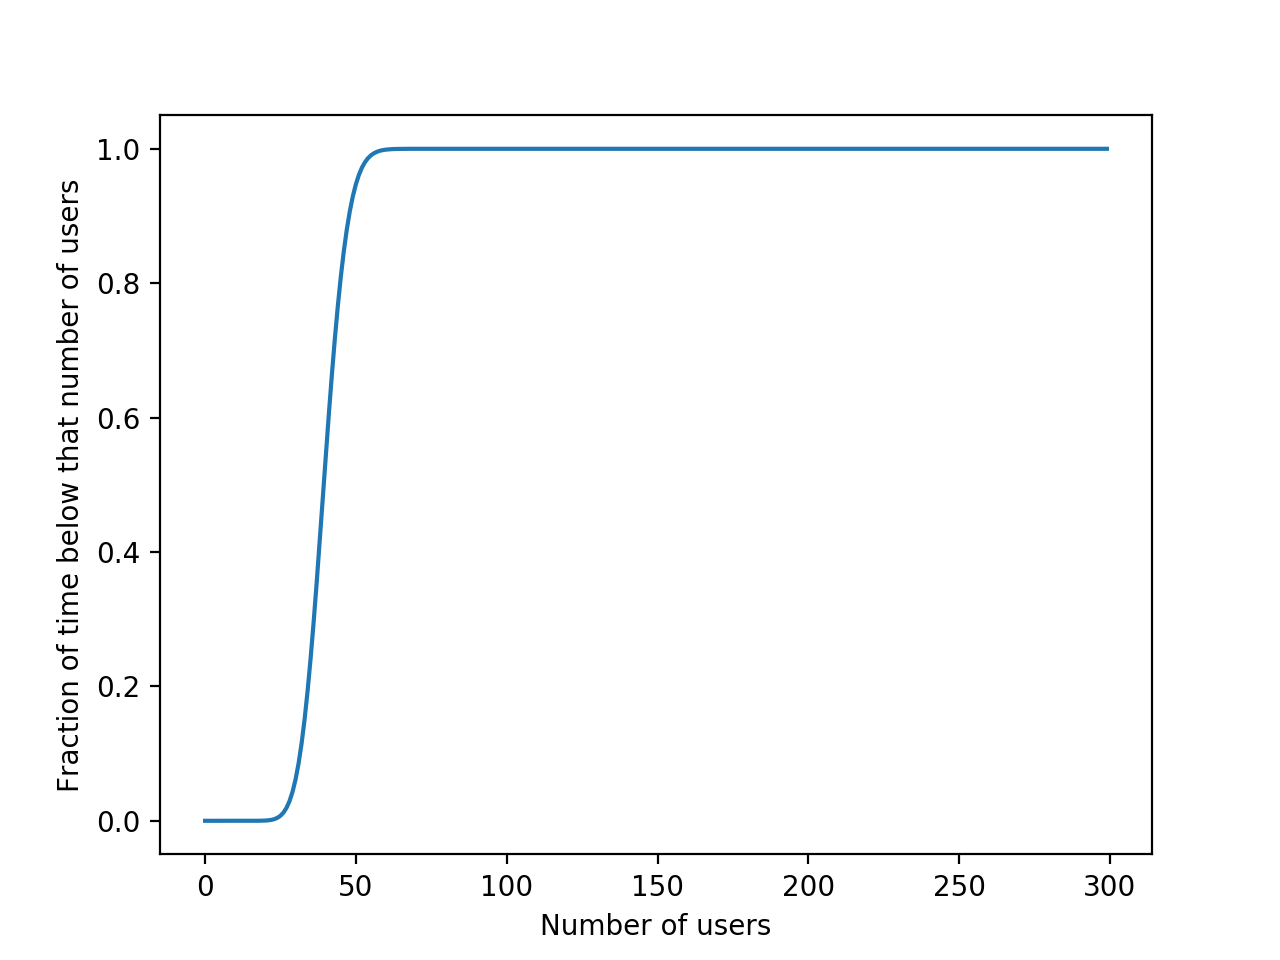

In [16]:
#Poisson Distribution
import matplotlib.pyplot as plt

%matplotlib notebook

from scipy.stats import poisson

N = 12000
T = 10*60*60
dt = 120

single_prob = dt/T

lam = N*dt/T
print('Average users at each time',lam)

p = []
for x in range(300):
    pro = poisson.cdf(x,lam)
    p.append(pro)
    
        
plt.plot(p)
plt.xlabel('Number of users')
plt.ylabel('Fraction of time below that number of users')
plt.show()

In [29]:
50000/12

4166.666666666667

In [30]:
0.1*100000

10000.0

In [31]:
4155+50000+69000

123155

In [32]:
0.1*365

36.5

In [33]:
rev = 7155+50000+69000

In [34]:
cost = 20000+30000+5000

In [35]:
(rev - cost)/rev

0.5640283777892275